# Curve Fitting and Residual Plots

#### Video 

https://www.youtube.com/watch?v=YgaBv6CXfvo&list=PLL0SWcFqypCl4lrzk1dMWwTUrzQZFt7y0&index=16 (Linear vs Nonlinear models)

Google Colab link: https://drive.google.com/file/d/1kbuPtjjxJv0DkUQN9edK8fKqJyWI8qDr/view?usp=sharing


### Libraries Needed
- matplotlib
- scipy
- pandas
- numpy
- seaborn

In [1]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns

C:\Users\taylo\AppData\Local\Temp\ipykernel_18456\262068537.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Start with a linear model (3rd order polynomial)

Linear fits are ones in which the inputs of the functioned are assumed to have a linear relationship with the output. Despite a third order polynomial not being a straight line (what the usual definition of a linear line is), it is considered linear as the parameters are interpreted as transformed inputs. 

Linear functions take the form of $$y = c + c_{1}x_{1} + c_{2}x_{2} + _{\dots} + c_{n}x_{n}$$


In [2]:
# Set matplotlib parameters for PDF font type and font size
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.size'] = 14

# Load the data - found in the same directory as the script
filename = r'ElectronMobility.csv'

#data taken from https://www.itl.nist.gov/div898/strd/nls/data/thurber.shtml
df = pd.read_csv(filename)

# Extract the mobility and density data from the loaded data
# Clean them up by dropping missing values
y = df['Mobility'].dropna()
x = df['Density Ln'].dropna()



fig = plt.figure(1, figsize=[5,5])

# Generate a color palette with seaborn
colors = sns.cubehelix_palette(5, start=2)

<Figure size 500x500 with 0 Axes>

#### Fit the curve and plot the original data and fitted curve

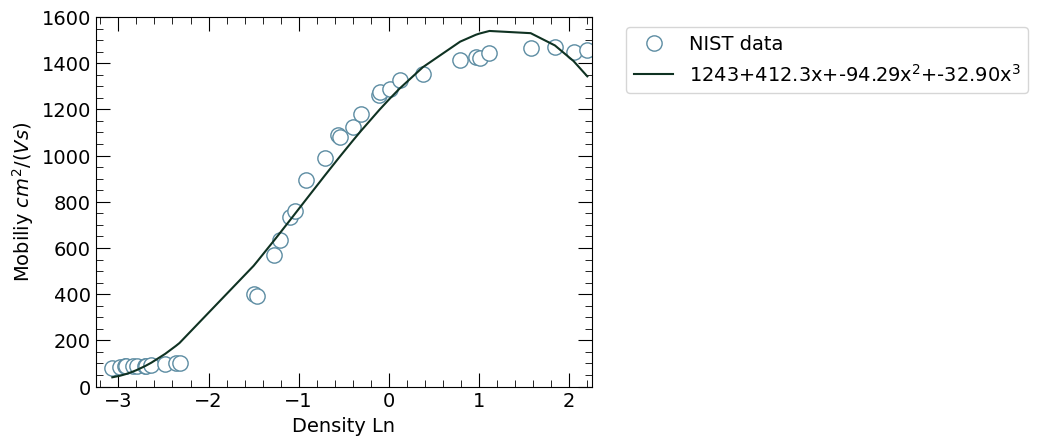

In [3]:
# Define a function for a third-order polynomial
def third_order_poly(x, c, c1, c2, c3):
    return c + c1 * x + c2 * x**2 + c3 * x**3

# Fit the third-order polynomial model to the data
popt, pcov = curve_fit(third_order_poly, x, y)

# Extract the optimal parameters from the curve fit
c = popt[0]
c1 = popt[1]
c2 = popt[2]
c3 = popt[3]

# Plot the original data points
plt.plot(x,y,marker='o', color=colors[2], linestyle='', markersize=11, mfc='white',label='NIST data')

# Plot the fitted curve as mobility vs density 
plt.plot(x,third_order_poly(x,*popt),marker='None', linestyle='-',color=colors[4], markersize=11, mfc='white',label=f'{c:.0f}+{c1:.1f}x+{c2:.2f}x$^2$+{c3:.2f}x$^3$')


# Enable minor ticks and set major and minor ticks to be on the inside of the plot
plt.minorticks_on()
plt.tick_params(direction='in',right=True, top=True, left=True, bottom=True)
plt.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=True)  
plt.tick_params(direction='in',which='minor', length=5, bottom=True, top=True, left=True, right=True)
plt.tick_params(direction='in',which='major', length=10, bottom=True, top=True, left=True, right=True)
plt.xlim([-3.25,2.25])
plt.ylim([0,1600])
plt.xlabel('Density Ln')
plt.ylabel('Mobiliy $cm^2/(Vs)$') 
plt.legend(bbox_to_anchor=(1.05, 1.0))


# Save the plot to a file with high resolution and tight bounding box
plt.savefig('third_order_poly_fit.png', dpi=300,bbox_inches="tight")

### Plot the residuals of the fitted third order polynomial

Residuals are the differences between the observed values and the values of the fitted curve. Residuals should ideally be randomly distributed around zero. A pattern in the residuals may be indicitive of an ill fitting curve. Large residual values indicate points that may not be fitted well. 

As seen below, the fit of the third order polynomial is fine but not amazing. There are some large residual values that demonstrate points that are not fit well enough.


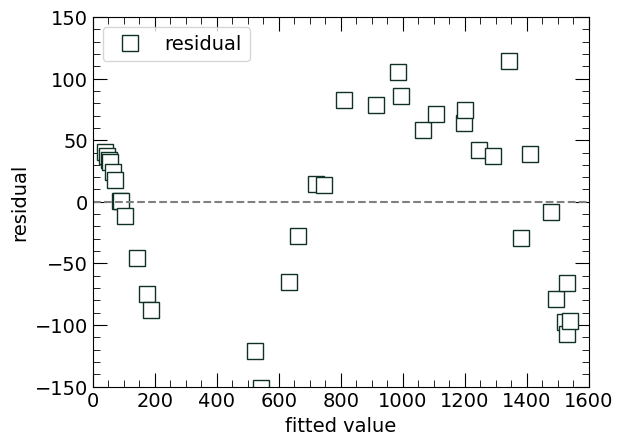

In [4]:
popt,pcov = curve_fit(third_order_poly,x,y)
c=popt[0]
c1=popt[1]
c2=popt[2]
c3=popt[3]
z=76

# Plot the residuals (difference between actual and fitted values) as residual vs fitted value
plt.plot(third_order_poly(x,*popt),y-third_order_poly(x,*popt),marker='s', linestyle='',color=colors[4], markersize=11, mfc='white',label=f'residual')
plt.axhline(0,linestyle='--',color='grey')


plt.minorticks_on()
plt.tick_params(direction='in',right=True, top=True, left=True, bottom=True)
plt.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=True)  
plt.tick_params(direction='in',which='minor', length=5, bottom=True, top=True, left=True, right=True)
plt.tick_params(direction='in',which='major', length=10, bottom=True, top=True, left=True, right=True)
plt.xlim([0,1600])
plt.ylim([-150,150])
plt.xlabel('fitted value')
plt.ylabel('residual') 
plt.legend()


plt.savefig('third_order_poly_fit_bias.png', dpi=300,bbox_inches="tight")

## Nonlinear fitting example

Nonlinear fits are fits in which the output is not proportional to the change in the input. Nonlinear functions can show up as exponential growth, logistic regression, and rational functions.

Nonlinear functions often take the shape of $$y = a \cdot e^{bx}$$ $$ y = \frac{a + bx}{1 + cx}$$ $$ y=\log{(ax+b)}$$

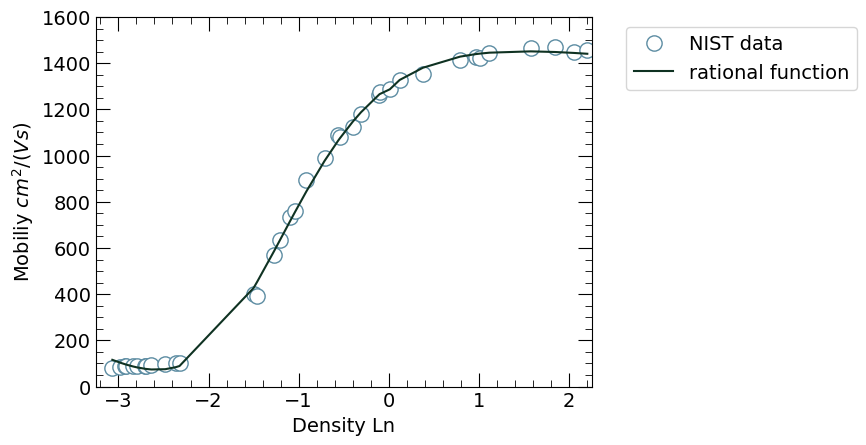

In [5]:
# Using the same data as before define a rational function to preform nonlinear curve fitting
def rational_function(x,c,c1,c2,c3,c4,c5,c6):
    return (c + c1*x + c2*x**2 + c3*x**3) / (1 + c4*x + c5*x**2 + c6*x**3)

popt,pcov = curve_fit(rational_function,x,y)
c=popt[0]
c1=popt[1]
c2=popt[2]
c3=popt[3]
c4=popt[4]
c5=popt[5]
c6=popt[6]
plt.plot(x,y,marker='o', color=colors[2], linestyle='', markersize=11, mfc='white',label='NIST data')
plt.plot(x,rational_function(x,*popt),marker='None', linestyle='-',color=colors[4], markersize=11, mfc='white',label=f'rational function')


plt.minorticks_on()
plt.tick_params(direction='in',right=True, top=True, left=True, bottom=True)
plt.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=True)  
plt.tick_params(direction='in',which='minor', length=5, bottom=True, top=True, left=True, right=True)
plt.tick_params(direction='in',which='major', length=10, bottom=True, top=True, left=True, right=True)
plt.xlim([-3.25,2.25])
plt.ylim([0,1600])
plt.xlabel('Density Ln')
plt.ylabel('Mobiliy $cm^2/(Vs)$') 
plt.legend(bbox_to_anchor=(1.05, 1.0))




plt.savefig('rational_function_fit.png', dpi=300,bbox_inches="tight")

### Plot the residuals of the rational function curve fitting

As seen below, the fitting of the nonlinear rational function fits quite a bit better than the third order polynomial. This function has smaller residuals which indicate better fitted points. This is because the loaded data had a stronger nonlinear relationship than a linear one. 

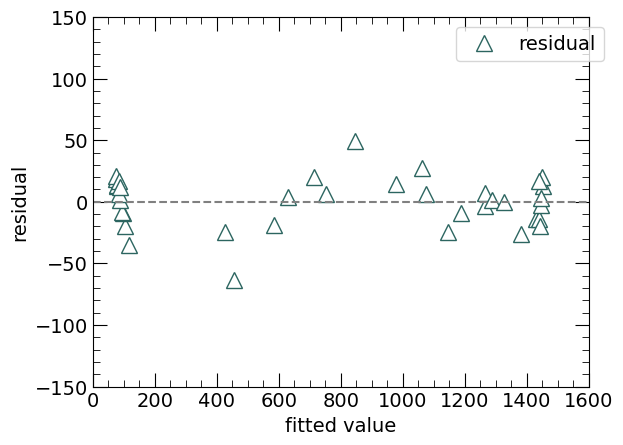

In [6]:
def rational_function(x,c,c1,c2,c3,c4,c5,c6):
    return (c + c1*x + c2*x**2 + c3*x**3) / (1 + c4*x + c5*x**2 + c6*x**3)

popt,pcov = curve_fit(rational_function,x,y)
c=popt[0]
c1=popt[1]
c2=popt[2]
c3=popt[3]
c4=popt[4]
c5=popt[5]
c6=popt[6]
#plt.plot(x,y,marker='o', color=colors[2], linestyle='', markersize=11, mfc='white',label='NIST data')
plt.plot(rational_function(x,*popt),y-rational_function(x,*popt),marker='^', linestyle='',color=colors[3], markersize=11, mfc='white',label=f'residual')
plt.axhline(0,linestyle='--',color='grey')

plt.minorticks_on()
plt.tick_params(direction='in',right=True, top=True, left=True, bottom=True)
plt.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=True)  
plt.tick_params(direction='in',which='minor', length=5, bottom=True, top=True, left=True, right=True)
plt.tick_params(direction='in',which='major', length=10, bottom=True, top=True, left=True, right=True)
plt.xlim([0,1600])
plt.ylim([-150,150])
plt.xlabel('fitted value')
plt.ylabel('residual') 
plt.legend(bbox_to_anchor=(1.05, 1.0))




plt.savefig('rational_function_residual.png', dpi=300,bbox_inches="tight")